In [3]:
# Importing the dataset from keras
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
# Checking the ‘type’
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


<Figure size 432x288 with 0 Axes>

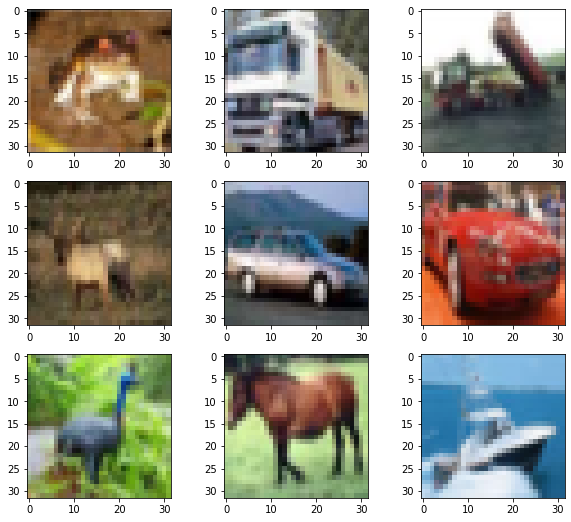

In [6]:
import matplotlib.pyplot as plt
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [7]:
# Printing examples in 'y_train'
for i in range(5):
  print(y_train[i])

[6]
[9]
[9]
[4]
[1]


In [8]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


In [9]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0.0
1.0


In [11]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans

x_train = x_train.reshape(len(x_train),-1)
y_train = y_train

total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(x_train)

MiniBatchKMeans(n_clusters=10)

In [12]:
kmeans.labels_


array([8, 7, 3, ..., 0, 3, 6], dtype=int32)

In [13]:
def retrieve_info(cluster_labels,Y):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """
  # Initializing
    reference_labels = {}
  # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
      index = np.where(cluster_labels == i,1,0)
      num = np.bincount(Y[index==1]).argmax()
      reference_labels[i] = num
    return reference_labels

In [14]:
Y=y_train.reshape(-1)
reference_labels = retrieve_info(kmeans.labels_,Y)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print(reference_labels)

{0: 9, 1: 6, 2: 0, 3: 8, 4: 0, 5: 6, 6: 7, 7: 8, 8: 5, 9: 4}


In [15]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])

[5 8 8 6 9 6 6 4 0 9 6 8 8 5 6 8 8 5 7 4]
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]]


In [16]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.2167


# Optimizing the code

In [32]:
# Function to calculate metrics for the model
def calculate_metrics(model,out):
   print('Number of clusters is {}'.format(model.n_clusters))
   print('Inertia : {}'.format(model.inertia_))
   print('Homogeneity : {}'.format(metrics.homogeneity_score(out,model.labels_)))

In [33]:
from sklearn import metrics
cluster_number = [15,30,60,120,240,480]
for cluster_num in cluster_number:
    total = len(np.unique(y_test))
    # Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = cluster_num)
    # Fitting the model to training set
    kmeans.fit(x_train)
    # Calculating the metrics
    calculate_metrics(kmeans,Y)
    # Calculating reference_labels
    ref = retrieve_info(kmeans.labels_,Y)
    # ‘number_labels’ is a list which denotes the number displayed in image
    num = np.random.rand(len(kmeans.labels_))
    for cluster_num in range(len(kmeans.labels_)):
        num[cluster_num] = ref[kmeans.labels_[cluster_num]]
    print('Accuracy score : {}'.format(accuracy_score(num ,y_train)))
    print('\n')

Number of clusters is 15
Inertia : 5916298.5
Homogeneity : 0.08625582413085095
Accuracy score : 0.22846


Number of clusters is 30
Inertia : 5530138.0
Homogeneity : 0.11042120969460859
Accuracy score : 0.25466


Number of clusters is 60
Inertia : 5205707.0
Homogeneity : 0.13670783107359788
Accuracy score : 0.28464


Number of clusters is 120
Inertia : 4933765.0
Homogeneity : 0.16130825892064446
Accuracy score : 0.30188


Number of clusters is 240
Inertia : 4709754.0
Homogeneity : 0.18633239567085635
Accuracy score : 0.32248


Number of clusters is 480
Inertia : 4501404.0
Homogeneity : 0.2150654728280116
Accuracy score : 0.34232




In [39]:
# Testing model on Testing set
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = 500)

# Fitting the model to testing set
kmeans.fit(x_test)

# Calculating the metrics
calculate_metrics(kmeans,y_test)

# Calculating the reference_labels
ref = retrieve_info(kmeans.labels_, y_test)

# ‘number_labels’ is a list which denotes the number displayed in image
num = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
    num[i] = ref[kmeans.labels_[i]]

print('Accuracy score : {}'.format(accuracy_score(num ,y_test)))
print('\n')

Number of clusters is 500
Inertia : 2.741556123709546e-33
Homogeneity : 0.26312522253876575
Accuracy score : 0.3623




Task 1: Run the above code by solving all issues

Task 2: Optimize the code to improve the accuracy using given tutorial

Task 3: Try to run the code by using differnet dataset(Other than digits)